# Decision Tree Example

### 라이브러리 선언

In [1]:
import numpy as np
import pandas as pd 

# 모델 라이브러리 선언
from sklearn import datasets, tree

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import pandas as pd

url = 'https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/cars.csv'
featuresData = pd.read_csv(url)#, index_col=0)
featuresData.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


### 2. 특성선정 및 데이터 분리

In [2]:
# 상관관계 확인
corrDf = featuresData.select_dtypes(np.number).corr()
corrDf.head()

,age,gender,miles,debt,income,sales
age,1.000000,-0.000702,0.232399,0.218896,0.239644,0.352609
gender,-0.000702,1.000000,-0.031355,-0.033181,-0.034317,-0.036350
miles,0.232399,-0.031355,1.000000,0.544791,0.422141,0.636676
debt,0.218896,-0.033181,0.544791,1.000000,0.491790,0.835541
income,0.239644,-0.034317,0.422141,0.491790,1.000000,0.674685


In [3]:
# 인덱스컬럼 초기화
corrResult = corrDf.reset_index()

In [4]:
corrResult

,index,age,gender,miles,debt,income,sales
0,age,1.000000,-0.000702,0.232399,0.218896,0.239644,0.352609
1,gender,-0.000702,1.000000,-0.031355,-0.033181,-0.034317,-0.036350
2,miles,0.232399,-0.031355,1.000000,0.544791,0.422141,0.636676
3,debt,0.218896,-0.033181,0.544791,1.000000,0.491790,0.835541
4,income,0.239644,-0.034317,0.422141,0.491790,1.000000,0.674685
5,sales,0.352609,-0.036350,0.636676,0.835541,0.674685,1.000000


In [5]:
# 상관관계 계수 비율 선정
featuresStd = 0.5

In [6]:
label = "sales"

In [7]:
features = list(corrResult [ (abs(corrResult[label]) > featuresStd) &
                              (abs(corrResult[label]) != 1) ]['index'])
features

['miles', 'debt', 'income']

In [8]:
label = ['sales']
label

['sales']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
trainingData_features, \
testData_features,\
trainingData_label,\
testData_label,\
trainingData_all,\
testData_all = \
    train_test_split(featuresData[features],
                     featuresData[label],
                     featuresData,
                     test_size=0.3,
                     random_state=1)

In [11]:
trainingData_features.head()

,miles,debt,income
718,47,16771,9160
720,10,6796,4264
341,28,0,1987
291,27,1074,2918
46,14,9592,1305


In [12]:
print(trainingData_features.shape)
print(trainingData_label.shape)
print(testData_features.shape)
print(testData_label.shape)

(674, 3)
(674, 1)
(289, 3)
(289, 1)


### 3. 모델선언 및 학습

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [14]:
model_method = RandomForestRegressor(n_estimators=100, random_state=1)

In [15]:
# rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
# rf.fit(X_train, y_train)

In [16]:
# Define Model depth= 100~200
#model_method = tree.DecisionTreeRegressor(random_state=1)

In [17]:
# Learning (Feature & Label)
model = model_method.fit(trainingData_features, trainingData_label)

C:\Users\kopo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [18]:
model

RandomForestRegressor(random_state=1)

In [19]:
import pickle

# save
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

# load
with open('model.pickle', 'rb') as f:
    data = pickle.load(f)

In [20]:
data

RandomForestRegressor(random_state=1)

### 4. 예측

In [21]:
# 샘플 예측

In [22]:
miles =  32
debt = 3000
income = 5000

In [23]:
testdata = pd.DataFrame( [ [      miles,debt,income]     ]     )

In [24]:
predict = model.predict(testdata)

C:\Users\kopo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [25]:
predict

array([11851.66])

### [실습] 5. 데이터 정리

In [26]:
predict = model.predict(testData_features)

In [27]:
len(predict)

289

In [28]:
testData_all.head()

,age,gender,miles,debt,income,sales
241,28,1,20,414,9900,5265
854,53,0,32,51908,7169,23894
527,57,1,32,9503,5479,9319
906,33,1,23,5809,5548,13722
345,52,1,29,15752,6277,22145


In [29]:
testData_all["PREDICT_RF"] = predict

In [30]:
testData_all.sort_index(inplace=True)

Text(0, 0.5, 'ax2_value')

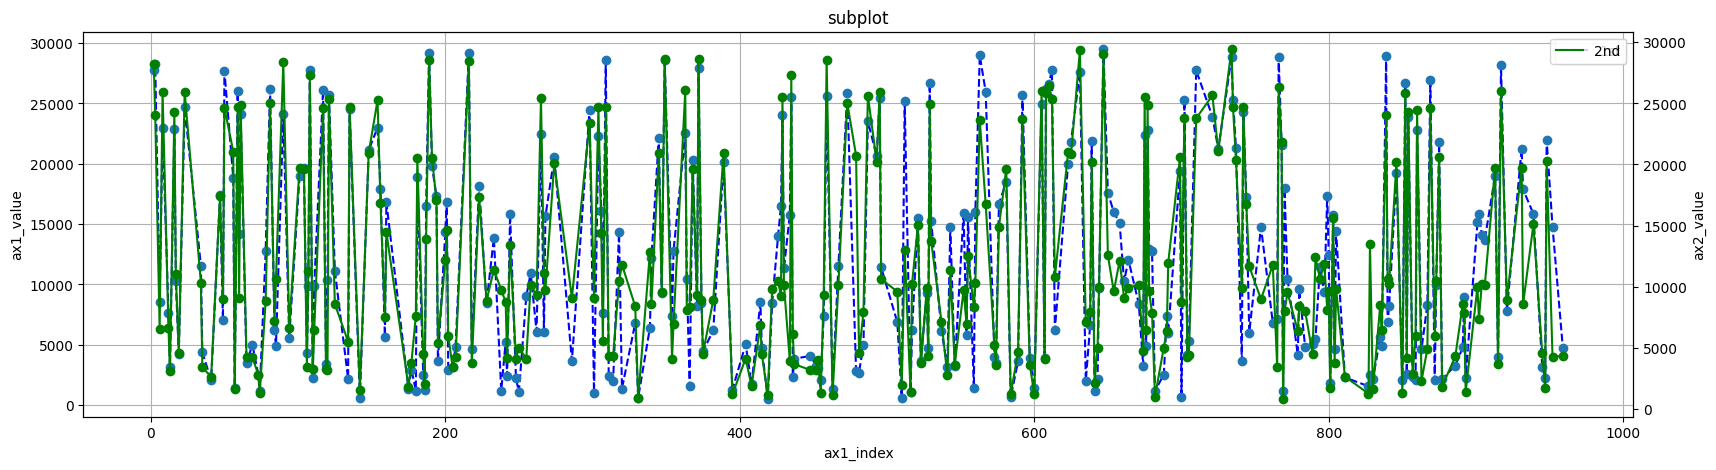

In [31]:
#필요 라이브러리 정의
import matplotlib.pyplot as plt
%matplotlib inline

# 팝업 창 활용하여 차트 시연
x=testData_all.index
y = testData_all.sales
y2 = testData_all.PREDICT_RF

# 이중축
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,1,1)
#figure, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(x,y, 'b--',lw=1.5, label = '1st')
ax1.plot(x,y, 'o')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylabel('ax1_value')
ax1.set_xlabel('ax1_index')
plt.title('subplot')
ax2 = ax1.twinx()
ax2.plot(x,y2, 'g', lw=1.5, label='2nd')
ax2.plot(x,y2, 'go')
ax2.legend(loc=0)
ax2.set_ylabel('ax2_value')

### 6. 정확도 측정

In [32]:
import math

In [33]:
mean_absolute_error(testData_all['sales'], testData_all['PREDICT_RF'])  

2319.2584775086507

In [34]:
math.sqrt(mean_squared_error(testData_all['sales'], testData_all['PREDICT_RF']) )

3431.889474145427

In [35]:
r2_score(testData_all['sales'], testData_all['PREDICT_RF'])  

0.8535761101317971

### 모델 재사용

##### 1. 모델 저장

In [36]:
import pickle

In [37]:
with open("cars_core.dump", "wb") as fw:
    pickle.dump(model,fw)

##### 2. 모델 불러오기

In [38]:
with open("cars_core.dump", "rb") as fr:
    loadedModel = pickle.load(fr)

In [39]:
loadedModel

RandomForestRegressor(random_state=1)

In [40]:
result = loadedModel.predict(testData_features)

In [41]:
result

array([ 8760.25, 24310.72,  9868.12, 10149.82, 20955.52,  4365.8 ,
        1842.64, 11130.3 ,  3414.35,  8835.31, 25974.34,  9546.61,
       20498.69, 19622.03,  6442.79,  6393.16, 19675.35,  9997.82,
        1267.51,  6607.08,  8873.52, 20950.5 , 12497.9 , 28355.85,
       28565.3 ,  1018.11,  4134.55,  9301.31, 10339.21, 10449.99,
        4329.08,  9758.99,  2641.81, 28655.42, 11030.26,  6176.93,
       14395.85,  1704.14, 11395.07,  2166.17, 15101.63, 26316.77,
        4248.32, 12821.44, 28568.21, 24846.63, 23409.6 , 23776.93,
       24713.53, 10334.49,  3261.22,  7509.48,  1711.72,  3944.39,
       10153.  , 20199.81, 26015.72, 24472.74,  2303.68,  1382.76,
        4055.22, 20860.46,  6573.11, 25631.31, 25031.6 ,  1154.58,
        9246.88,  3613.63, 24671.01,  4083.67, 17073.09,  1951.97,
        1606.04, 10256.19,  7919.76, 24661.74,  7108.62, 20966.02,
        4571.71, 24683.46,  8537.53, 16751.62, 12120.36,  9998.42,
       25250.6 ,  4664.79, 24039.18,  9626.12,  1208.66,  4471